## Imports

In [18]:
print('')

In [72]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [75]:
print('hi')

hi


In [77]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [5]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [6]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

## the action!!
For all events with data, load their object . add tp_max and tc  to lists (for plotting)

In [73]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
flinnengdahl_regions = []
eqs = {}
count = 0

In [54]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [78]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

356


In [56]:
from obspy.clients.iris import Client

In [57]:
client = Client()

In [58]:
client.flinnengdahl(lat=eq.event_stats['eq_lat'], lon=eq.event_stats['eq_long'], rtype="code")

39

In [59]:
import pandas as pd

In [60]:
fe_df = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/code/flinn_engdahl_lookup.csv', index_col = 'region_number')

In [101]:
WINDOW_LENGTH = 1
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object_1s_bandpass_01_19_snr_20.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
        print(eq.calculated_params['tau_p'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
        fe = client.flinnengdahl(lat=eq.event_stats['eq_lat'], lon=eq.event_stats['eq_long'], rtype="code")
        flinnengdahl_regions.append(fe_df.iloc[fe].group_number)
    except Exception:
        print('in except')
        continue

0
[]
1
in except
2
[]
3
in except
4
[array([0.        , 0.02367998, 0.05739466, ..., 2.82357445, 2.82621411,
       2.82882713])]
5
[array([0.        , 0.02356765, 0.0564156 , ..., 2.29188966, 2.2902475 ,
       2.28863691]), array([0.        , 0.02353329, 0.05601803, ..., 2.89798847, 2.89447288,
       2.89103392])]
6
in except
7
[array([0.        , 0.10290405, 0.17054578, ..., 3.11209407, 3.12160221,
       3.13106564]), array([0.        , 0.09008462, 0.1995821 , ..., 2.97933238, 2.98873603,
       2.99696995]), array([0.        , 0.02342958, 0.05607154, ..., 0.89737811, 0.89879135,
       0.9002377 ]), array([0.        , 0.02320469, 0.05482029, ..., 2.16189836, 2.16440862,
       2.16734934]), array([0.        , 0.02367619, 0.05666574, ..., 2.15876798, 2.15848592,
       2.15818415]), array([0.        , 0.02369682, 0.05524113, ..., 0.75555014, 0.7560934 ,
       0.75662207]), array([0.        , 0.02410375, 0.05755715, ..., 2.91127532, 2.91318977,
       2.91467992]), array([0.      

34
[]
35
[array([0.        , 0.15380191, 0.17295091, ..., 2.43031312, 2.43802721,
       2.44557429])]
36
in except
37
[array([0.        , 0.02123308, 0.04792337, ..., 0.82962392, 0.83124102,
       0.83281672]), array([0.        , 0.09903694, 0.18594764, ..., 6.15817703, 6.15973358,
       6.15697388]), array([0.        , 0.08093939, 0.19259244, ..., 3.69365805, 3.74037665,
       3.78739871]), array([0.        , 0.09238891, 0.19709568, ..., 6.38928606, 6.47808999,
       6.56699493]), array([0.        , 0.0893506 , 0.2000534 , ..., 4.01093979, 4.02147688,
       4.0310979 ])]
38
[array([0.        , 0.02365082, 0.05609468, ..., 1.44500283, 1.45024382,
       1.45550844]), array([0.        , 0.02521087, 0.06428195, ..., 2.42831036, 2.43364643,
       2.43903068]), array([0.        , 0.01054163, 0.02580797, ..., 0.9265443 , 0.92799811,
       0.92944925]), array([0.        , 0.01982254, 0.04318461, ..., 0.32339205, 0.32339671,
       0.32340152]), array([0.        , 0.03021466, 0.102443

73
[]
74
[array([0.        , 0.0131866 , 0.03646144, ..., 6.22804944, 6.22357352,
       6.21908984])]
75
[array([0.        , 0.15662012, 0.16378019, ..., 1.94509393, 1.94639856,
       1.95008941])]
76
[array([0.        , 0.07973625, 0.1793818 , ..., 1.95924447, 1.96172189,
       1.96426309]), array([0.        , 0.05752633, 0.14307454, ..., 1.90934073, 1.92256177,
       1.93572343]), array([0.        , 0.09155512, 0.19816598, ..., 0.5100919 , 0.51528533,
       0.52080842]), array([0.        , 0.09047829, 0.199406  , ..., 1.88833721, 1.89046914,
       1.89264449]), array([0.        , 0.08729565, 0.20134377, ..., 1.8089024 , 1.81643313,
       1.82426283]), array([0.        , 0.02340991, 0.05546433, ..., 2.35083421, 2.35549986,
       2.36028941]), array([0.        , 0.02360386, 0.05651185, ..., 3.98197793, 3.98826451,
       3.9946805 ]), array([0.        , 0.0858459 , 0.20547675, ..., 1.98989099, 1.98903963,
       1.9883168 ]), array([0.        , 0.09279037, 0.19591103, ..., 4.15

160
[]
161
[array([0.        , 0.02340283, 0.05541167, ..., 4.81864122, 4.81956591,
       4.82014167])]
162
[array([0.        , 0.02203043, 0.0535757 , ..., 4.136679  , 4.13978221,
       4.14284177])]
163
in except
164
[array([0.        , 0.15519072, 0.1669018 , ..., 3.53970446, 3.55868842,
       3.5782784 ])]
165
in except
166
in except
167
in except
168
in except
169
[array([0.        , 0.02160519, 0.04904343, ..., 0.5122844 , 0.51222128,
       0.51213288]), array([0.        , 0.02219978, 0.0507906 , ..., 1.26661898, 1.27499112,
       1.28342269]), array([0.        , 0.02459844, 0.06032787, ..., 1.74255091, 1.74617456,
       1.7498355 ]), array([0.        , 0.02338938, 0.05543422, ..., 4.26046203, 4.29699379,
       4.33302255]), array([0.        , 0.0233995 , 0.05572843, ..., 4.13021562, 4.16526412,
       4.19981585]), array([0.        , 0.031745  , 0.1135429 , ..., 1.22595581, 1.23078966,
       1.23555949]), array([0.        , 0.02382157, 0.05751808, ..., 0.2389104 , 0.2394

183
[]
184
[array([0.        , 0.15684782, 0.16006055, ..., 4.09517354, 4.14413299,
       4.19421176]), array([0.        , 0.15649955, 0.16275583, ..., 4.41739097, 4.4657626 ,
       4.51405576]), array([0.        , 0.15646857, 0.16394325, ..., 2.85089784, 2.86864057,
       2.89120853]), array([0.        , 0.1565506 , 0.16293977, ..., 4.48855221, 4.51476825,
       4.54173998])]
185
[array([0.        , 0.02101422, 0.04856388, ..., 2.12039135, 2.12118385,
       2.12195954])]
186
[]
187
[array([0.        , 0.15557455, 0.16756345, ..., 1.37699378, 1.38391524,
       1.38841667]), array([0.        , 0.02303406, 0.05341967, ..., 1.81632327, 1.81717798,
       1.81800109])]
188
in except
189
[]
190
[array([0.        , 0.15610529, 0.16342869, ..., 2.05769804, 2.06307643,
       2.06873955])]
191
in except
192
[]
193
[array([0.        , 0.15317825, 0.17504282, ..., 4.60338384, 4.62892229,
       4.6543706 ])]
194
[]
195
in except
196
in except
197
[]
198
[array([0.        , 0.0222509 , 0.05

219
in except
220
[]
221
[]
222
in except
223
[array([0.        , 0.02354778, 0.05586411, ..., 2.98106696, 2.98118562,
       2.98104137])]
224
in except
225
[]
226
in except
227
[]
228
[]
229
[array([0.        , 0.0247632 , 0.05917521, ..., 3.32805876, 3.33174915,
       3.33548101]), array([0.        , 0.02405169, 0.05760318, ..., 3.4080112 , 3.41178691,
       3.41560104])]
230
[]
231
[array([0.        , 0.02350321, 0.05599273, ..., 5.11298897, 5.15504384,
       5.19713229]), array([0.        , 0.02340891, 0.05544614, ..., 2.72972026, 2.7340819 ,
       2.73855416]), array([0.        , 0.02314141, 0.05411211, ..., 3.64010825, 3.64784692,
       3.655731  ]), array([0.        , 0.02396873, 0.05816055, ..., 4.23741625, 4.24830891,
       4.25925205]), array([0.        , 0.02344616, 0.05561865, ..., 2.63149184, 2.63071805,
       2.62989292]), array([0.        , 0.02416971, 0.05921367, ..., 4.15835129, 4.15561104,
       4.1524322 ])]
232
[array([0.        , 0.03251664, 0.10592214, ..

267
[array([0.        , 0.15286208, 0.17593426, ..., 2.0231074 , 2.02322807,
       2.02322456])]
268
in except
269
[]
270
[]
271
[array([0.        , 0.02418569, 0.0595376 , ..., 4.42226389, 4.42879274,
       4.43519258])]
272
[array([0.        , 0.02373405, 0.05719658, ..., 3.72407204, 3.72469621,
       3.72533741]), array([0.        , 0.02341936, 0.05580788, ..., 6.35861557, 6.38998669,
       6.41900091]), array([0.        , 0.02346094, 0.05762439, ..., 3.33668594, 3.34089909,
       3.34501807]), array([0.        , 0.02433148, 0.05923683, ..., 4.60134375, 4.60152903,
       4.60172706]), array([0.        , 0.02274783, 0.05328262, ..., 5.19537202, 5.17967968,
       5.16505142]), array([0.        , 0.0229415 , 0.0549828 , ..., 4.05040342, 4.05455352,
       4.0586543 ]), array([0.        , 0.06312624, 0.00794909, ..., 3.5406436 , 3.54081246,
       3.54098267]), array([0.        , 0.023512  , 0.05615997, ..., 1.83575584, 1.84302192,
       1.85022431]), array([0.        , 0.023057

318
[]
319
[array([0.        , 0.0232573 , 0.05493787, ..., 1.41032641, 1.41289461,
       1.41550013])]
320
[array([0.        , 0.02056565, 0.03925629, ..., 4.00415208, 4.00368124,
       4.00312125]), array([0.        , 0.02266866, 0.05183864, ..., 3.47102633, 3.46622916,
       3.4615556 ]), array([0.        , 0.02495665, 0.06091649, ..., 4.14119179, 4.14057336,
       4.13980967]), array([0.        , 0.02548279, 0.06267053, ..., 4.16048843, 4.15979943,
       4.15897138]), array([0.        , 0.0399105 , 0.05631452, ..., 5.45423685, 5.46590552,
       5.47766493])]
321
[]
322
in except
323
in except
324
[array([0.        , 0.02278761, 0.05261886, ..., 2.55775036, 2.55992739,
       2.56211273])]
325
[]
326
[]
327
[]
328
[array([0.        , 0.02330548, 0.05535174, ..., 0.97170432, 0.97455081,
       0.9773914 ]), array([0.        , 0.02354883, 0.0567271 , ..., 0.90615314, 0.90609462,
       0.90603725]), array([0.        , 0.02415631, 0.05900356, ..., 0.12791506, 0.12791661,
       0

In [84]:
a = []
a.append([0]*10)
a.append([1]*5)

In [85]:
a

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1]]

In [95]:
plot_mags = []
for i in range(0, len(list_tpmax)):
    plot_mags.append([list_mags[i]]*len(list_tpmax[i]))

In [96]:
plot_mags

[[],
 [],
 [5.3],
 [5.1, 5.1],
 [5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2,
  5.2],
 [5.0],
 [6.7],
 [5.4],
 [5.3],
 [5.2, 5.2],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0],
 [5.1],
 [5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.1],
 [5.3, 5.3, 5.3, 5.3],
 [5.0],
 [],
 [5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1],
 [],
 [5.1],
 [5.0],
 [5.2],
 [5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4],
 [],
 [5.3],
 [5.1, 5.1, 5.1, 5.1, 5.1],
 [5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3,
  5.3],
 [5.4, 5.4],
 [5.0, 5.0, 5.0, 5.0],
 [5.2, 5.2, 5.2, 5.2, 5.2],
 [],
 [6.3],
 [],
 [5.1],
 [5.2, 5.2, 5.2],
 [],
 [5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  5.54,
  

In [97]:
np.concatenate(np.array(plot_mags))

/tmp/ipykernel_2351341/2039621986.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.concatenate(np.array(plot_mags))


array([5.3 , 5.1 , 5.1 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 ,
       5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 5.  , 6.7 ,
       5.4 , 5.3 , 5.2 , 5.2 , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
       5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.1 ,
       5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
       5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
       5.  , 5.1 , 5.3 , 5.3 , 5.3 , 5.3 , 5.  , 5.1 , 5.1 , 5.1 , 5.1 ,
       5.1 , 5.1 , 5.1 , 5.1 , 5.  , 5.2 , 5.4 , 5.4 , 5.4 , 5.4 , 5.4 ,
       5.4 , 5.4 , 5.4 , 5.4 , 5.4 , 5.3 , 5.1 , 5.1 , 5.1 , 5.1 , 5.1 ,
       5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 ,
       5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.3 , 5.4 , 5.4 ,
       5.  , 5.  , 5.  , 5.  , 5.2 , 5.2 , 5.2 , 5.2 , 5.2 , 6.3 , 5.1 ,
       5.2 , 5.2 , 5.2 , 5.54, 5.54, 5.54, 5.54, 5.54, 5.54, 5.54, 5.54,
       5.54, 5.54, 5.54, 5.54, 5.54, 5.54, 5.54, 5.

/tmp/ipykernel_2351341/2317045495.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.scatter(np.concatenate(np.array(plot_mags)), np.concatenate(np.array(list_tpmax)))


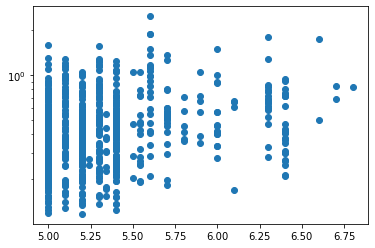

In [100]:
plt.scatter(np.concatenate(np.array(plot_mags)), np.concatenate(np.array(list_tpmax)))
plt.yscale('log')

(array([  0., 963., 103., 987.,  29.,  29., 148., 621., 549.,   7.,  26.,
         49., 169.,   0., 109.,  57.,   6.,   0.,  29.,   0.,   0.,  21.,
        170.,   1.,  20.,  15.,  13.,   7.,   4.,  16., 159., 189.,   0.,
          6., 186.,   1.,   5.,  11.,  76.,  11., 271.,   2.,  14., 118.,
          9.,   0.,   9.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <BarContainer object of 50 artists>)

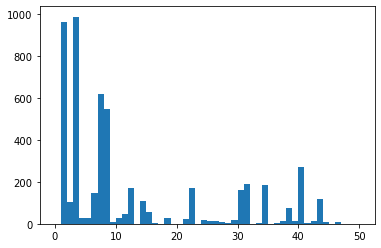

In [62]:
plt.hist(flinnengdahl_regions[100:], np.arange(0, 51,1))

In [63]:
eq.__dict__

{'event_stats': {'name': '20191101_001721.a',
  'eq_lat': -22.5768,
  'eq_long': -66.0455,
  'eq_depth': 261610.0,
  'eq_mag': 4.3,
  'eq_mag_type': 'mb'},
 'event': Event:	2019-11-01T00:17:21.991000Z | -22.577,  -66.046 | 4.3  mb

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=11139729")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=41543186")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=196442462")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements,
 'data_stats': {'picks': {'GE.SALTA.': 2019-11-01T00:18:04.798393Z},
  'sensor_types': ['VEL', 'VEL', 'VEL']},
 'inv': Inventory created at 2022-02-14T02:29:54.557738Z
	Sending institution: SeisComP (GFZ)
	Contains:
		Networks (1):
			GE
		Stations (1

In [64]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = cat.clear()
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')

In [65]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [66]:
cat

7083 Event(s) in Catalog:
2018-01-31T23:13:21.270000Z |  -1.744,  -77.672 | 5.2  mb
2018-01-31T20:01:45.890000Z | +56.458, -149.066 | 5.0  Mww
...
2021-12-01T16:58:37.493000Z | +36.181, +140.049 | 5.0  Mww
2021-12-01T04:39:24.977000Z | -37.922,  -73.619 | 5.1  Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [67]:
from obspy.clients.iris import Client
client = Client()

In [68]:
WINDOW_LENGTH = 1
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'+eq_with_data[eq_no]+'/eq_object_1s.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
        fe = client.flinnengdahl(lat=eq.event_stats['eq_lat'], lon=eq.event_stats['eq_long'], rtype="code")
        flinnengdahl_regions.append(fe_df.iloc[fe].group_number)
    except Exception:
        print('in except')
        continue

0
1
in except
2
3
in except
4
5
in except
6
in except
7
in except
8
9
in except
10
in except
11
12
13
14
in except
15
in except
16
in except
17
18
19
in except
20
in except
21
in except
22
in except
23
24
in except
25
in except
26
in except
27
in except
28
29
in except
30
31
32
33
34
in except
35
in except
36
in except
37
38
39
40
in except
41
42
43
44
45
46
47
in except
48
in except
49
in except
50
in except
51
in except
52
in except
53
in except
54
55
in except
56
57
in except
58
59
60
61
62
in except
63
in except
64
in except
65
in except
66
in except
67
68
69
70
in except
71
in except
72
in except
73
in except
74
in except
75
in except
76
in except
77
in except
78
79
80
81
82
83
84
in except
85
in except
86
87
in except
88
89
90
91
92
in except
93
94
in except
95
in except
96
97
in except
98
99
100
in except
101
in except
102
in except
103
104
in except
105
106
in except
107
in except
108
in except
109
in except
110
111
112
in except
113
114
in except
115
116
117
118
119
120
121
12

In [47]:
eq.data

42 Trace(s) in Stream:

NU.ACON..HHE | 2019-07-08T00:04:00.810000Z - 2019-07-08T00:14:04.180000Z | 100.0 Hz, 60338 samples
...
(40 other traces)
...
TC.TRT2..HHZ | 2019-07-08T00:04:02.930000Z - 2019-07-08T00:14:02.920000Z | 100.0 Hz, 60000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

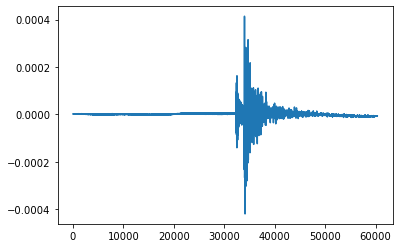

In [44]:
plt.plot(eq.data[0])

In [39]:
eq.data_stats['picks']['NU.CARN.00']-

2019-07-08T00:09:13.430000Z

In [63]:
eq.__dict__

{'event_stats': {'name': '20190708_000902.a',
  'eq_lat': 10.8437,
  'eq_long': -85.6324,
  'eq_depth': 60710.0,
  'eq_mag': 5.2,
  'eq_mag_type': 'Mww'},
 'event': Event:	2019-07-08T00:09:02.927000Z | +10.844,  -85.632 | 5.2 Mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=11061979")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=39585786")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=195223375")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements,
 'data_stats': {'picks': {'NU.CARN.00': 2019-07-08T00:09:13.430000Z,
   'TC.MARA.': 2019-07-08T00:09:17.290000Z,
   'II.JTS.00': 2019-07-08T00:09:18.524538Z,
   'NU.ACON.': 2019-07-08T00:09:23.800000Z,
   'NU.NANN.': 2019-07-08T00:09:24.110000Z},
  'se

In [57]:
(eq.data_stats['picks']['NU.CARN.00']-eq.data[0].stats.starttime)*100

31262.0

336.723371991
563.955353879


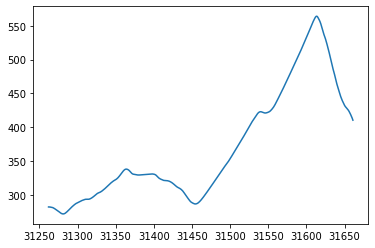

In [62]:
plt.plot(np.arange(31262, 31662, 1), eq.calculated_params['tau_p'][0][31262:31662])
print(max(eq.calculated_params['tau_p'][0][31262:31362]))
print(max(eq.calculated_params['tau_p'][0][31262:31662]))

In [ ]:
for 

(array([989., 104., 998.,  30.,  29., 159., 629., 585.,   7.,  26.,  54.,
        200.,   0., 125.,  57.,   6.,   0.,  29.,   0.,   0.,  21., 171.,
          1.,  24.,  15.,  13.,   7.,   4.,  16., 172., 204.,   0.,   6.,
        188.,   1.,   7.,  11.,  78.,  11., 272.,   2.,  14., 121.,   9.,
          0.,   9.,   0.,   0.,   0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <BarContainer object of 49 artists>)

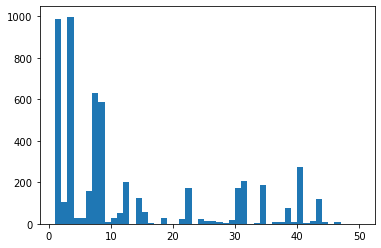

In [71]:
plt.hist(flinnengdahl_regions, np.arange(1, 51,1))

In [14]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [15]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [16]:
len(np.arange(3, 6.5, 0.1))

35

In [17]:
np.linspace(0.2,1,45)

array([ 0.2       ,  0.21818182,  0.23636364,  0.25454545,  0.27272727,
        0.29090909,  0.30909091,  0.32727273,  0.34545455,  0.36363636,
        0.38181818,  0.4       ,  0.41818182,  0.43636364,  0.45454545,
        0.47272727,  0.49090909,  0.50909091,  0.52727273,  0.54545455,
        0.56363636,  0.58181818,  0.6       ,  0.61818182,  0.63636364,
        0.65454545,  0.67272727,  0.69090909,  0.70909091,  0.72727273,
        0.74545455,  0.76363636,  0.78181818,  0.8       ,  0.81818182,
        0.83636364,  0.85454545,  0.87272727,  0.89090909,  0.90909091,
        0.92727273,  0.94545455,  0.96363636,  0.98181818,  1.        ])

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

3 [-0.01863371  0.07727994]
2667 2667
4.4 [ 0.35336766 -1.6928857 ]
617 617
[ 0.35336766 -1.6928857 ] [ 0.10325099  0.50123534]


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  

Text(0.5, 0.98, 'window = 1')

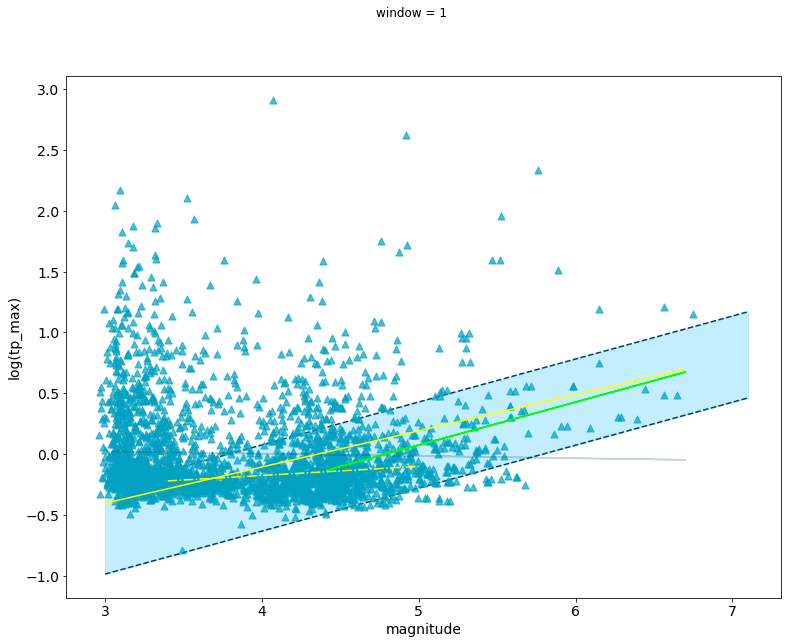

In [18]:
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
x_aves_tp = []
count = 1
eq_count = 0
medians = [[] for _ in range(0, 45)]
medians_of_medians = [[] for _ in range(0, 45)]
for mag_lim in [3, 4.4]:#np.arange(3.0, 6.5, 0.1):
    #print(mag_lim)
    y_aves_tp = []
    x_aves_tp = []
    for i  in range(0, len(list_mags)):
        #print(i)
        #mag_lim = 3
        #print(list_mags[i])
        #print(list_tpmax[i])
        if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
            #print('in if')
            mean_tp = np.mean(list_tpmax[i]) 
            std_tp = np.std(list_tpmax[i]) 
            y_tp = [] 
            for j in list_tpmax[i]: 
                if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                    y_tp.append(math.log(j, 10))
                elif len(list_tpmax[i])==1:
                    y_tp.append(math.log(j, 10))
            #print(y_tp)
            x_tp = np.zeros(len(y_tp))  
            x_tp = x_tp + list_mags[i]  
            #print(x_tp)
            c = 0
            #if str(mag_lim) == str(3):# or mag_lim == 3: or 4.4?
                #print('in if')
            #medians_index = int(np.round(x_tp[0],1)*10)-30
            if len(x_tp)>0 and mag_lim == 3.0: # or len(x_tc)>0:
                if math.isnan(np.median(y_tp))==False:
                    #axs.scatter(np.array(x_tp)+np.random.uniform(-0.05, 0.05), y_tp, s = 15, alpha = 0.2, c = cs[c], marker = '.', zorder =3) 
                #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                    axs.scatter(list_mags[i]+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                medians[int(np.round(x_tp[0],1)*10)-30].append(y_tp)#axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                #FOR CURVE FITTING
            if math.isnan(np.median(y_tp))==False:  
                #if np.median(y_tp):
                y_aves_tp.append(np.median(y_tp))
                medians_of_medians[int(np.round(x_tp[0],1)*10)-30].append(np.median(y_tp))
                x_aves_tp.append(list_mags[i])
            #if math.isnan(np.median(y_tc))==False:
                #y_aves_tc.append(np.median(y_tc))
                #x_aves_tc.append(list_mags[i])
    popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
    params.append([popt, len(x_aves_tp)])
    print(mag_lim, popt)
    axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = opacities[count], zorder =10)
    if str(mag_lim) == str(4.4):
        popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
        axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='lime', zorder =100)
        popt_final, pcov_final = popt, pcov
    #print(x_aves_tp)
    #print(y_aves_tp)
    print(len(x_aves_tp), len(y_aves_tp))
    # add 2 * std banding
    count += 1
med = []
med_x = []
med2 = []
xs = np.arange(3,7.5,0.1)
for i in range(0, len(medians_of_medians)):
    med.append(np.median(medians_of_medians[i]))
    if len(medians_of_medians[i])>0:
        med_x.append(xs[i])
        med2.append(np.median(medians_of_medians[i]))
#plt.scatter(np.arange(3,7.5,0.1), med, marker = '^', color='silver', zorder = 1000)
popt, pcov = popt_final, pcov_final
perr = np.sqrt(np.diag(pcov))
print(popt, perr)
x_me = np.arange(3, 7.2, 0.1)
x_lower_me = x_me - perr[1]*2
x_upper_me =  x_me + perr[1]*2
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
axs.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow', zorder =100)
popt, pcov = curve_fit(model_function_2, np.array(med_x[4:21]), np.array(med2[4:21]))
axs.plot(med_x[4:21], model_function_2(np.array(med_x[4:21]), *popt), color='yellow', zorder =100, linestyle = '-.')
    # add 2 * std banding
#axs[0].set_ylim([0.2,2])
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#count += 1
#x = np.arange(3, 7.2, 0.1)
#y = 0.14*x-0.83
#axs.plot(x, y, color = '#2a83ab', zorder =12)
axs.set_xlabel("magnitude", fontsize = 14) 
#axs[1].set_xlabel("magnitude") 
axs.set_ylabel("log(tp_max)", fontsize = 14) 
axs.tick_params(axis='both', which='major', labelsize=14)
axs.tick_params(axis='both', which='minor', labelsize=14)
#axs[1].set_ylabel("tc")
#axs.set_title("tp_max") 
#axs[1].set_title("tc") 
fig.suptitle("window = "+str(WINDOW_LENGTH))
#axs.set_ylim(-1, 1)

In [19]:
print()

In [20]:
model_function_2(np.array(med_x), *popt)

array([-0.25093471, -0.24345343, -0.23597216, -0.22849088, -0.22100961,
       -0.21352834, -0.20604706, -0.19856579, -0.19108451, -0.18360324,
       -0.17612196, -0.16864069, -0.16115942, -0.15367814, -0.14619687,
       -0.13871559, -0.13123432, -0.12375304, -0.11627177, -0.10879049,
       -0.10130922, -0.09382795, -0.08634667, -0.0788654 , -0.07138412,
       -0.06390285, -0.05642157, -0.0489403 , -0.04145903, -0.03397775,
       -0.02649648, -0.0190152 , -0.01153393, -0.00405265,  0.00342862,
        0.01839117,  0.02587244])

In [21]:
popt

array([ 0.07481274, -0.47537294])

In [22]:
for i in range(0, len(medians_of_medians)):
    print(np.median(medians_of_medians[i]))

0.00150826559597
-0.0533005285562
-0.0919039750889
-0.136345823217
-0.138115173902
-0.208193689016
-0.217153701653
-0.20498431887
-0.197257096843
-0.192332176966
-0.221839747123
-0.174229750452
-0.199913007855
-0.162929523364
-0.164009656058
-0.150895873856
-0.145352264668
-0.11130691542
-0.115223265168
-0.0390155896066
-0.0969583060594
-0.119932969061
-0.100609963548
0.249778741294
0.0325634923943
0.0639003529639
0.308354880731
0.358515014549
2.33792854708
0.233169744912
0.558741727227
0.480374580973
1.19355444276
0.303367850044
0.414061060926
nan
0.484512418377
1.14816359298
nan
nan
nan
nan
nan
nan
nan


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must be the same size

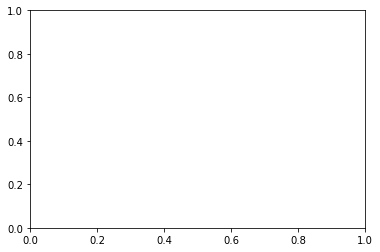

In [23]:
plt.scatter(np.arange(3,7.5,0.1), np.median(medians_of_medians))

In [ ]:
popt

In [ ]:
pcov

In [ ]:
gradt = []
intercept = []
for i in params:
    gradt.append(i[0])
    intercept.append(i[1])

In [ ]:
bins

In [ ]:
plt.plot(n)

In [ ]:
%matplotlib qt
# create figure and axis objects with subplots()
fig,axs = plt.subplots(4,1, figsize = (15,9), sharex = True)
ax = axs[0]
ax4 = axs[1]
ax2 = axs[2]
ax3 = axs[3]
# make a plot
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
ax.plot(bins[:-1]+0.05, n, color="red", marker="o")
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
for i in range(1, len(n)):
    n[i] = n[i]+n[i-1]
#ax4 = ax.twinx()
ax4.plot(bins[:-1]+0.05, n, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("year",fontsize=14)
# set y-axis label
#ax.set_ylabel("lifeExp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
#ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.arange(3,6.6,0.1),intercept, color="blue",marker="o")
ax2.hlines(-0.83, 3, 7.5, color='blue')
ax3.plot(np.arange(3,6.6,0.1),gradt, color="green",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax3.hlines(0.14, 3, 7.5, color='green')

ax.set_yscale('log')
ax4.set_yscale('log')
axs[0].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[0].grid(axis = 'x', which='minor', linestyle=':')
axs[1].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[1].grid(axis = 'x', which='minor', linestyle=':')
axs[2].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[2].grid(axis = 'x',which='minor', linestyle=':')
axs[3].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[3].grid(axis = 'x', which='minor', linestyle=':')
ax.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()

ax.set_ylabel("log(N)",color="red",fontsize=14)
ax4.set_ylabel("log(cumulative N)",color="red",fontsize=14)
ax2.set_ylabel("intercept",color="blue",fontsize=14)
ax3.set_ylabel("gradient",color="green",fontsize=14)
ax3.set_xlabel('magnitude')
#ax3.set_xlim([3,5])
plt.show()

In [ ]:
plt.axvline()

In [ ]:
plt.hist(list_mags, bins = np.arange(3,7.5,0.1))
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('magnitude')

In [ ]:
x_tp

In [ ]:
y

In [ ]:
min(y_tp)

In [ ]:
x_tp

In [ ]:
plt.figure(figsize=(20,10))
y_limits = np.linspace(min(y_tp), max(y_tp), 40)
x_limits = np.linspace(3, 7, 41)
H, xedges, yedges = np.histogram2d(list(x_tp), list(y_tp), bins=[x_limits, y_limits])
H = H.T

plt.imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], (yedges[0]), (yedges[-1])], aspect = 0.5, cmap = 'inferno', vmin = np.log10(0.5))
plt.colorbar(label = 'log10(histogram amplitude)')

plt.ylabel('log10(tp_max)')
plt.xlabel('magntitude')
plt.ylim([-1,3])

#initial_guess = (1.4,0)
#res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
#x = np.linspace(min(mag_plot), max(mag_plot), 20)
#y = res.x[0] * x + res.x[1]
#plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.scatter(np.arange(3, 6.8, 0.1), np.log10(mag_bin_medians), marker = 'x', color = 'silver')


plt.scatter(med_x, med2, marker = '^', color='silver', zorder = 1000)

popt, pcov = curve_fit(model_function_2, np.array(med_x[4:20]), np.array(med2[4:20]))
plt.plot(med_x[4:20], model_function_2(np.array(med_x[4:20]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:28]), np.array(med2[20:28]))
plt.plot(med_x[20:28], model_function_2(np.array(med_x[20:28]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:]), np.array(med2[20:]))
plt.plot(med_x[20:], model_function_2(np.array(med_x[20:]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
plt.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow')

plt.show()

In [ ]:
popt

In [ ]:
x_tp = []
y_tp = []
for i  in range(0, len(list_mags)):
    mag_lim = 3.4
    count = 0
    if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
        mean_tp = np.mean(list_tpmax[i]) 
        std_tp = np.std(list_tpmax[i]) 
        for j in list_tpmax[i]: 
            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                y_tp.append(math.log(j, 10))
                count += 1
            elif len(list_tpmax[i])==1:
                y_tp.append(math.log(j, 10))
                count += 1

        x_mag = np.zeros(count)  
        x_mag = x_mag + list_mags[i]
        x_tp = np.concatenate((np.array(x_tp), np.array(x_mag)))


In [ ]:
x_mag